In [1]:
print('Hello')

Hello


In [4]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
fifa_data = pd.read_csv('fifa_data.csv')
fifa_data.head()

FileNotFoundError: [Errno 2] File fifa_data.csv does not exist: 'fifa_data.csv'

In [6]:
fifa_data = pd.read_csv('./fifa_data.csv')
fifa_data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Skill Moves,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,Weak Foot,Work Rate
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,4,26,86,72,28,59,94,86,4,Medium/ Medium
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,5,23,91,88,31,79,82,87,4,High/ Low
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,5,33,90,81,24,49,87,84,5,High/ Medium
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,1,13,58,43,21,64,68,13,3,Medium/ Medium
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,4,51,76,90,58,75,94,82,5,High/ High


In [7]:
# Function to clean the monetary values, erase K,M and 
def transform_money_to_number(string):
    last = len(string) - 1
    if 'K' in string:
        return float(string[1:last]) * 1000
    elif 'M' in string:
        return float(string[1:last]) * 1000000
    

In [8]:
fifa_data['Value'] = fifa_data['Value'].apply(transform_money_to_number)

In [9]:
fifa_data['Wage'].replace('[€K]','', inplace=True, regex=True)
fifa_data.rename(index=str, columns={'Wage': 'WageInK'}, inplace=True)

In [11]:
fifa_data['WageInK'] = pd.to_numeric(fifa_data['WageInK'])

In [12]:
pd.set_option('display.max_columns', None)
clubs = fifa_data.groupby(by='Club').mean()
clubs.head()

,Unnamed: 0,ID,Age,Overall,Potential,Value,WageInK,Special,Acceleration,Aggression,Agility,Balance,BallControl,Composure,Crossing,Curve,Dribbling,FKAccuracy,Finishing,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,HeadingAccuracy,Interceptions,International Reputation,Jersey Number,Jumping,LongPassing,LongShots,Marking,Penalties,Positioning,Reactions,ShortPassing,ShotPower,Skill Moves,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,Weak Foot
Club,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SSV Jahn Regensburg,9665.137931,219059.413793,25.655172,65.482759,69.275862,7.494828e+05,4.172414,1539.068966,62.413793,56.896552,62.379310,63.413793,56.965517,58.517241,49.827586,45.241379,51.241379,42.620690,39.448276,15.862069,14.620690,15.448276,15.862069,16.241379,51.896552,54.827586,1.000000,17.346154,66.896552,51.103448,45.620690,53.379310,43.448276,44.000000,61.103448,55.827586,53.137931,2.206897,53.965517,61.482759,62.344828,56.172414,66.137931,51.862069,38.275862,2.931034
1. FC Heidenheim 1846,9586.535714,219734.142857,24.000000,65.607143,71.821429,9.835714e+05,4.464286,1561.071429,61.464286,57.607143,62.678571,59.714286,55.857143,58.321429,47.821429,46.928571,51.571429,44.321429,43.678571,20.142857,20.464286,20.607143,20.321429,20.000000,49.464286,45.821429,1.043478,16.782609,65.071429,53.035714,46.357143,45.892857,48.428571,47.821429,60.392857,57.321429,55.357143,2.107143,43.535714,60.500000,60.250000,44.285714,65.357143,52.607143,43.035714,2.964286
1. FC Kaiserslautern,11526.653846,220848.230769,23.846154,63.500000,70.115385,6.403846e+05,1.769231,1523.576923,65.423077,50.038462,63.192308,65.423077,56.807692,54.538462,48.846154,47.115385,55.461538,42.923077,46.153846,14.307692,14.807692,13.346154,13.884615,13.923077,52.346154,41.307692,1.000000,25.666667,62.500000,50.000000,47.269231,46.538462,49.653846,49.807692,57.846154,57.923077,56.615385,2.269231,42.000000,65.692308,60.653846,43.192308,60.961538,52.000000,43.615385,2.923077
1. FC Köln,5364.392857,208388.714286,24.321429,70.785714,76.607143,4.882500e+06,13.250000,1671.285714,63.607143,60.500000,63.321429,63.000000,61.964286,62.071429,52.250000,50.107143,58.535714,43.642857,47.571429,17.571429,17.964286,16.178571,17.642857,17.607143,55.392857,48.285714,1.200000,14.920000,66.928571,54.821429,48.785714,49.571429,49.500000,52.750000,66.892857,62.000000,56.821429,2.535714,47.535714,64.964286,62.928571,49.500000,68.607143,54.464286,45.357143,2.964286
1. FC Magdeburg,9575.884615,226487.961538,24.692308,65.692308,70.500000,8.359615e+05,5.038462,1532.192308,66.269231,55.884615,64.461538,63.115385,58.653846,59.307692,49.769231,45.153846,54.115385,43.230769,43.923077,16.115385,14.769231,14.576923,14.384615,15.423077,53.923077,48.846154,1.000000,16.208333,70.115385,54.346154,46.615385,48.615385,48.538462,47.307692,60.269231,59.115385,54.269231,2.346154,48.615385,67.153846,63.769231,49.884615,66.538462,51.000000,41.884615,2.923077


In [13]:
# Remove irrelevant values from the clubs
clubs.drop(['ID','Jersey Number', 'Jumping', 'Unnamed: 0','LongPassing','LongShots', 'ShortPassing', 'Weak Foot','GKDiving','GKKicking','GKHandling','GKPositioning','HeadingAccuracy','Curve','GKDiving', 'Stamina'],axis=1, inplace=True)


In [14]:
# Sorting clubs by overall rating
clubs_with_best_overall = clubs.sort_values(by='Overall', ascending=False)
clubs_with_best_overall.head()

,Age,Overall,Potential,Value,WageInK,Special,Acceleration,Aggression,Agility,Balance,BallControl,Composure,Crossing,Dribbling,FKAccuracy,Finishing,GKReflexes,Interceptions,International Reputation,Marking,Penalties,Positioning,Reactions,ShotPower,Skill Moves,SlidingTackle,SprintSpeed,StandingTackle,Strength,Vision,Volleys
Club,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Juventus,27.160000,82.160000,85.400000,2.765900e+07,130.840000,1903.20000,70.600000,65.080000,70.720000,68.000000,71.600000,78.600000,60.720000,68.56000,54.240000,58.6400,18.680000,53.400000,2.727273,52.200000,58.2400,60.760000,79.440000,69.76000,3.040000,48.120,71.600000,51.240000,72.600000,68.120000,60.480000
Napoli,25.920000,79.960000,83.320000,2.040000e+07,70.840000,1854.60000,72.120000,66.000000,71.480000,67.880000,70.360000,73.080000,60.120000,66.64000,53.720000,55.6800,18.840000,55.680000,1.863636,56.480000,54.7200,57.960000,76.720000,65.04000,2.880000,52.640,72.720000,55.600000,68.360000,66.920000,53.280000
Inter,27.458333,79.708333,81.708333,1.941604e+07,66.583333,1835.25000,67.208333,63.958333,67.333333,63.416667,67.208333,74.000000,56.583333,63.87500,53.750000,55.5000,21.250000,53.291667,2.050000,54.000000,55.2500,61.875000,77.583333,66.62500,2.750000,48.125,67.375000,51.541667,72.916667,61.916667,55.791667
FC Barcelona,24.366667,79.100000,85.633333,2.815333e+07,159.133333,1859.70000,68.333333,66.666667,66.333333,62.866667,72.166667,72.733333,58.766667,67.50000,54.766667,58.1000,16.433333,55.033333,2.172414,57.666667,57.9000,62.866667,75.600000,67.60000,2.766667,53.400,68.433333,55.833333,72.633333,67.500000,56.766667
Real Madrid,24.156250,78.343750,84.812500,2.724297e+07,154.812500,1808.84375,71.562500,62.718750,70.812500,69.406250,68.343750,70.812500,58.500000,65.90625,51.750000,54.0625,19.968750,54.250000,2.275862,54.031250,55.1875,57.937500,74.593750,64.84375,2.906250,50.500,70.343750,54.187500,68.218750,64.750000,51.250000


Text(0.5, 1.0, 'Best teams')

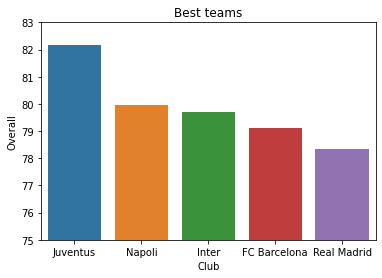

In [16]:
# Plot the 5 best teams and changing the size of the plot to see difference
lm = sns.barplot(x=clubs_with_best_overall.index[:5], y=clubs_with_best_overall.Overall[:5], data=clubs_with_best_overall)
lm.set(ylim=(75, 83))
lm.set_title('Best teams')